In [70]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By     # 태그 가져올 때
from selenium.webdriver import Keys             # pageDown 키를 누를 때 필요

In [71]:
# 로딩하는 시간 
import time

In [72]:
## 드라이버 설정
chrom_options = webdriver.ChromeOptions()               # 여기 옵션을 추가하여 브라우저 설정을 할 수 있습니다.
chrom_options.add_experimental_option('detach', True)   # 브라우저 꺼지는 것을 방지
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()),
                          options = chrom_options)

In [73]:
url = "https://store.steampowered.com/charts/topselling/global"
driver.get(url)
time.sleep(5)


In [74]:
import pandas as pd
import csv

In [110]:
title_elements = driver.find_elements(By.CSS_SELECTOR, "._1n_4-zvf0n4aqGEksbgW9N")
price_elements = driver.find_elements(By.CSS_SELECTOR, ".Wh0L8EnwsPV_8VAu8TOYr")

result_title = []
result_price = []

for t, p in zip(title_elements, price_elements):
    result_title.append(t.text)
    result_price.append(p.text)



# 결과 딕셔너리 초기화
df = pd.DataFrame({
    'Game Name' : result_title,
    '게임 가격' : result_price
})

# CSV 파일로 저장
csv_file = 'steam_games_TopSeller_bak1.csv'
df.to_csv(csv_file, index=False, encoding='utf-8-sig')



In [ ]:
import pandas as pd

In [146]:
df = pd.read_csv('steam_games_TopSeller_bak.csv')


In [261]:
data1 = pd.read_csv('steam_game_list.csv')
data2= pd.read_csv('steam_games_TopSeller_bak.csv')

# 각 데이터프레임에 순위 열 추가
data1['Rank'] = range(1, len(data1) + 1)
data2['Rank'] = range(1, len(data2) + 1)

# 두 데이터프레임을 게임 이름을 기준으로 합침
merged_data = pd.merge(data1, data2, on='Game Name', how='inner')

# 겹치는 게임 명과 갯수 출력
overlapping_game_names = merged_data['Game Name'].tolist()
num_overlapping_games = len(overlapping_game_names)

data1


,Game Name,Current Players,Peak Today,Rank
0,Counter-Strike 2,"725,930","1,491,977",1
1,Dota 2,"308,028","615,009",2
2,PUBG: BATTLEGROUNDS,"259,659","637,297",3
3,Apex Legends™,"145,375","387,994",4
4,Stardew Valley,"97,299","178,483",5
...,...,...,...,...
95,Cities: Skylines,"7,662","12,871",96
96,Phasmophobia,"7,651","26,017",97
97,Factorio,"7,602","15,147",98
98,The Witcher® 3: Wild Hunt,"7,587","17,176",99


In [210]:
print("겹치는 게임 명:")
for game_name in overlapping_game_names:
    print(game_name)

print("겹치는 게임의 총 갯수:", num_overlapping_games)

겹치는 게임 명:
Counter-Strike 2
Dota 2
PUBG: BATTLEGROUNDS
Apex Legends™
Stardew Valley
NARAKA: BLADEPOINT
Tom Clancy's Rainbow Six® Siege
HELLDIVERS™ 2
Grand Theft Auto V
Dragon's Dogma 2
Wallpaper Engine
Warframe
Rust
Team Fortress 2
Baldur's Gate 3
Monster Hunter: World
Palworld
War Thunder
ELDEN RING
Dead by Daylight
EA SPORTS FC™ 24
Myth of Empires
Last Epoch
Destiny 2
The Sims™ 4
Overwatch® 2
Limbus Company
Cyberpunk 2077
Balatro
RimWorld
THE FINALS
Supermarket Simulator
Yu-Gi-Oh! Master Duel
Battlefield™ V
Battlefield™ 2042
Euro Truck Simulator 2
NBA 2K24
Horizon Forbidden West™ Complete Edition
Backpack Battles
Lethal Company
Granblue Fantasy: Relink
Crusader Kings III
Enshrouded
TEKKEN 8
The Elder Scrolls® Online
Phasmophobia
겹치는 게임의 총 갯수: 46


In [211]:
# 겹치는 게임 명과 각 데이터프레임의 순위를 표 형태로 출력
overlapping_game_names = merged_data['Game Name'].tolist()
rank_data1 = merged_data['Rank_x']
rank_data2 = merged_data['Rank_y']

data = {'Game Name': overlapping_game_names, 'Rank in data1': rank_data1, 'Rank in data2': rank_data2}
df = pd.DataFrame(data)

print(df)

# CSV 파일로 저장
df.to_csv('rank_comparison.csv', index=False, encoding='utf-8')

                                   Game Name  Rank in data1  Rank in data2
0                           Counter-Strike 2              1              1
1                                     Dota 2              2             35
2                        PUBG: BATTLEGROUNDS              3              4
3                              Apex Legends™              4              2
4                             Stardew Valley              5             29
5                         NARAKA: BLADEPOINT              6             24
6            Tom Clancy's Rainbow Six® Siege              7              9
7                              HELLDIVERS™ 2              8              3
8                         Grand Theft Auto V              9             31
9                           Dragon's Dogma 2             10              6
10                          Wallpaper Engine             11             61
11                                  Warframe             14              8
12                       

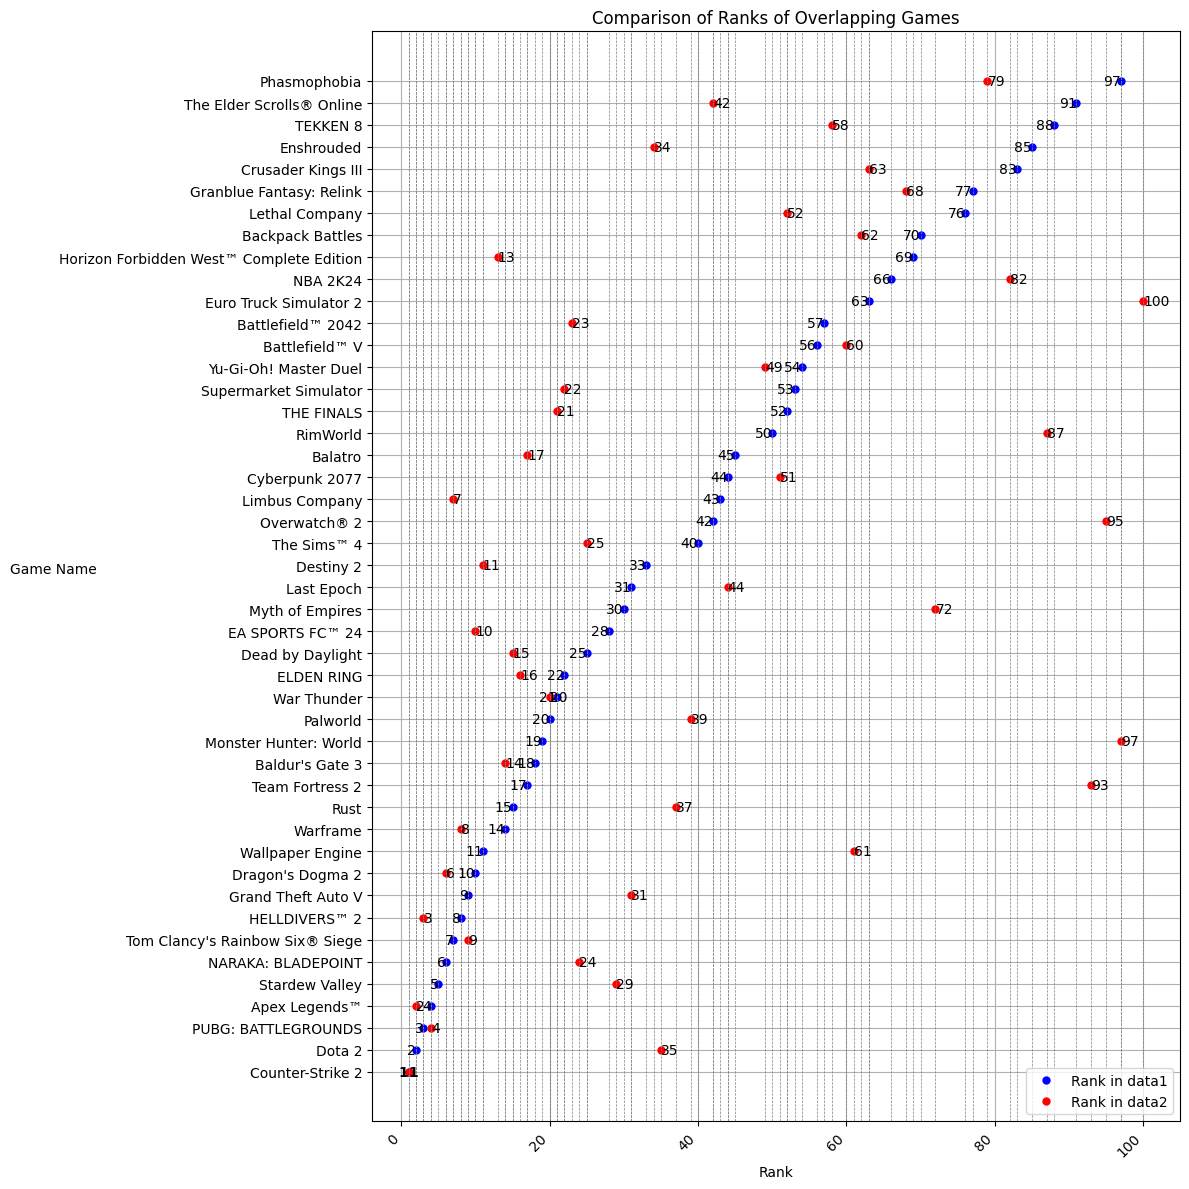

In [257]:
import matplotlib.pyplot as plt

# 겹치는 게임들의 순위 가져오기
overlapping_game_names = merged_data['Game Name'].tolist()
rank_data1 = merged_data['Rank_x']
rank_data2 = merged_data['Rank_y']

# 그래프 그리기
plt.figure(figsize=(12, 12))
plt.plot(rank_data1, overlapping_game_names, label='Rank in data1', marker='o', linestyle='', markersize=5, color='blue')
plt.plot(rank_data2, overlapping_game_names, label='Rank in data2', marker='o', linestyle='', markersize=5, color='red')
plt.xlabel('Rank')
plt.ylabel('Game Name', rotation=0)  # y 축 라벨을 90도 회전
plt.title('Comparison of Ranks of Overlapping Games')
plt.legend()

# x 축 라벨 회전 및 간격 조절
plt.xticks(rotation=45, ha='right')  # 라벨을 45도로 회전하고 오른쪽 정렬
plt.subplots_adjust(bottom=0.15)  # 라벨이 잘 보이도록 하단 여백 조절

# y 축 간격 조절
plt.yticks(overlapping_game_names)  # 겹치는 게임들 중에서 간격을 조절하여 표시

# 그래프 안에 숫자 적어주기 (순위가 같은 경우 볼드체로 표시)
for i in range(len(overlapping_game_names)):
    if rank_data1[i] == rank_data2[i]:
        plt.text(rank_data1[i], overlapping_game_names[i], str(rank_data1[i]), color='black', va='center', ha='right', weight='bold')
        plt.text(rank_data2[i], overlapping_game_names[i], str(rank_data2[i]), color='black', va='center', ha='left', weight='bold')
    else:
        plt.text(rank_data1[i], overlapping_game_names[i], str(rank_data1[i]), color='black', va='center', ha='right')
        plt.text(rank_data2[i], overlapping_game_names[i], str(rank_data2[i]), color='black', va='center', ha='left')


# 데이터가 있는 지점에 세로선 그리기
for rank1, rank2, game_name in zip(rank_data1, rank_data2, overlapping_game_names):
    plt.axvline(x=rank1, color='gray', linestyle='--', linewidth=0.5)  # data1의 순위에 세로선 그리기
    plt.axvline(x=rank2, color='gray', linestyle='--', linewidth=0.5)  # data2의 순위에 세로선 그리기


plt.grid(True)
plt.tight_layout()  # 그래프 재배치

plt.savefig('OverlappingGames.png', dpi=300)  # 이미지 파일로 저장, dpi는 해상도를 나타냅니다.
plt.show()


In [213]:
# 게임 별 순위 격차 계산
merged_data['Rank_Difference'] = abs(merged_data['Rank_x'] - merged_data['Rank_y'])

# 결과 확인
print(merged_data[['Game Name', 'Rank_x', 'Rank_y', 'Rank_Difference']])

                                   Game Name  Rank_x  Rank_y  Rank_Difference
0                           Counter-Strike 2       1       1                0
1                                     Dota 2       2      35               33
2                        PUBG: BATTLEGROUNDS       3       4                1
3                              Apex Legends™       4       2                2
4                             Stardew Valley       5      29               24
5                         NARAKA: BLADEPOINT       6      24               18
6            Tom Clancy's Rainbow Six® Siege       7       9                2
7                              HELLDIVERS™ 2       8       3                5
8                         Grand Theft Auto V       9      31               22
9                           Dragon's Dogma 2      10       6                4
10                          Wallpaper Engine      11      61               50
11                                  Warframe      14       8    

In [262]:
# 게임 별 순위 격차 계산
merged_data['Rank_Difference'] = merged_data['Rank_x'] - merged_data['Rank_y']

# 격차가 큰 순으로 정렬
merged_data_sorted = merged_data.sort_values(by='Rank_Difference', ascending=True)

# 결과 확인
print(merged_data_sorted[['Game Name', 'Rank_x', 'Rank_y', 'Rank_Difference']])

                                   Game Name  Rank_x  Rank_y  Rank_Difference
15                     Monster Hunter: World      19      97              -78
13                           Team Fortress 2      17      93              -76
25                              Overwatch® 2      42      95              -53
10                          Wallpaper Engine      11      61              -50
21                           Myth of Empires      30      72              -42
35                    Euro Truck Simulator 2      63     100              -37
29                                  RimWorld      50      87              -37
1                                     Dota 2       2      35              -33
4                             Stardew Valley       5      29              -24
8                         Grand Theft Auto V       9      31              -22
12                                      Rust      15      37              -22
16                                  Palworld      20      39    

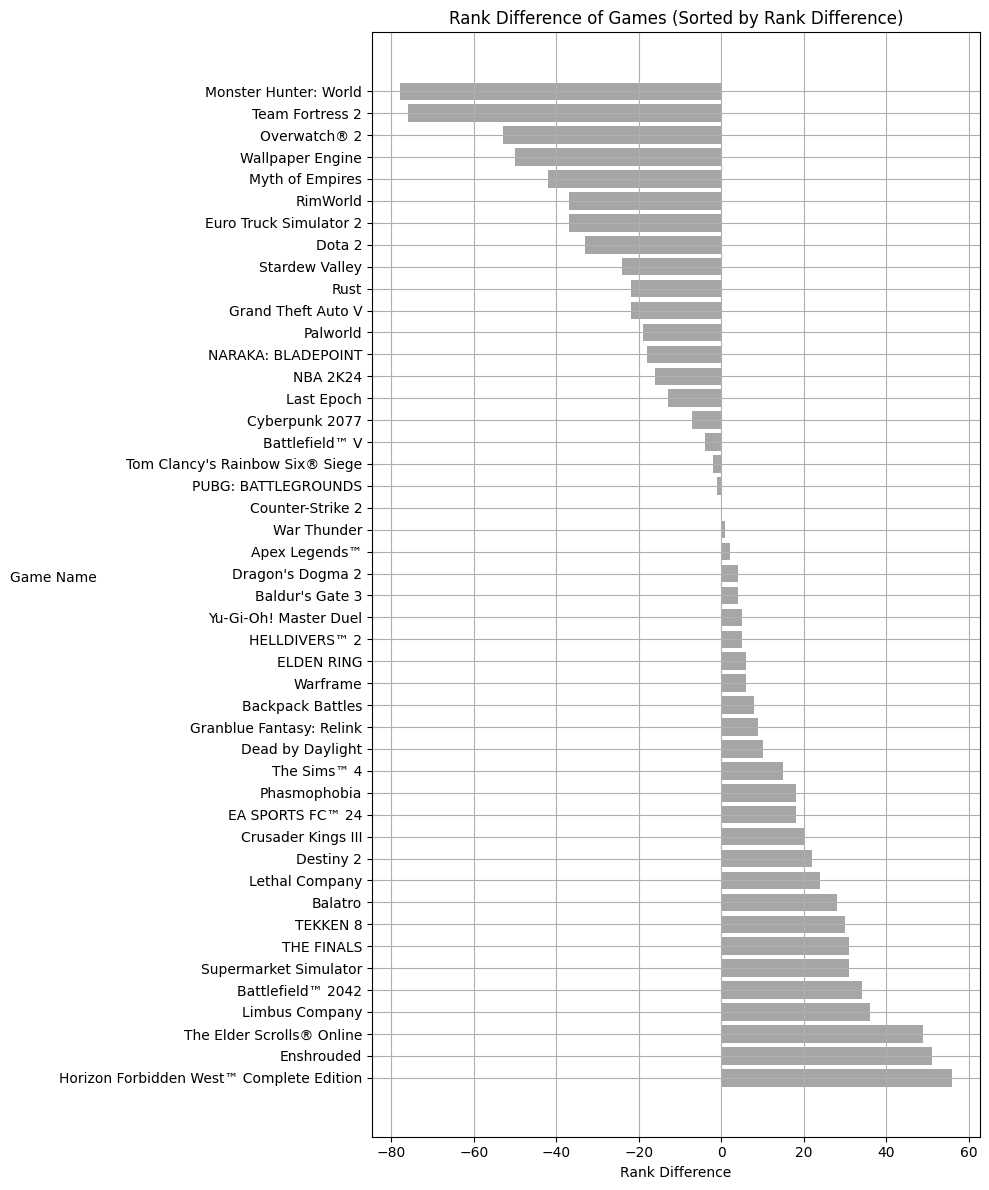

In [222]:
import matplotlib.pyplot as plt

# 격차가 큰 순으로 정렬
merged_data_sorted = merged_data.sort_values(by='Rank_Difference', ascending=False)

# 격차 데이터
game_names = merged_data_sorted['Game Name']
rank_difference = merged_data_sorted['Rank_Difference']

# 그래프 그리기
plt.figure(figsize=(10, 12))
plt.barh(game_names, rank_difference, color='gray', alpha=0.7)
plt.ylabel('Game Name', rotation = 0)
plt.xlabel('Rank Difference')
plt.title('Rank Difference of Games (Sorted by Rank Difference)')
plt.grid(True)
plt.tight_layout()  # 그래프 재배치

plt.savefig('OverlappingGames_difference1.png', dpi=300)  # 이미지 파일로 저장, dpi는 해상도를 나타냅니다.
plt.show()


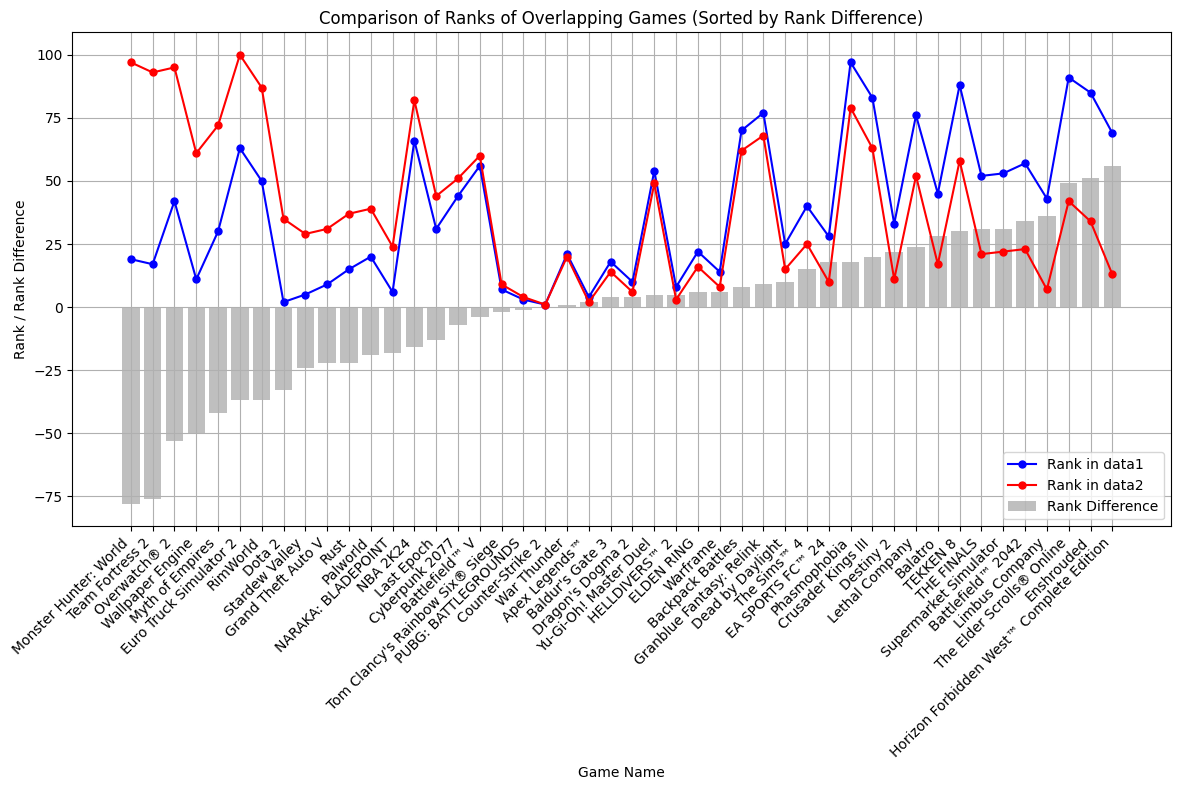

In [221]:
import matplotlib.pyplot as plt

# 순위 격차가 작은 순으로 데이터프레임 정렬
merged_data_sorted = merged_data.sort_values(by='Rank_Difference')

# 겹치는 게임들의 순위 가져오기
overlapping_game_names = merged_data_sorted['Game Name'].tolist()
rank_data1 = merged_data_sorted['Rank_x']
rank_data2 = merged_data_sorted['Rank_y']
rank_difference = merged_data_sorted['Rank_Difference']

# 그래프 그리기
plt.figure(figsize=(12, 8))

# rank1과 rank2를 선 그래프로 그리기
plt.plot(overlapping_game_names, rank_data1, label='Rank in data1', marker='o', linestyle='-', markersize=5, color='blue')
plt.plot(overlapping_game_names, rank_data2, label='Rank in data2', marker='o', linestyle='-', markersize=5, color='red')

# 격차를 막대 그래프로 그리기
plt.bar(overlapping_game_names, rank_difference, color='gray', alpha=0.5, label='Rank Difference')

plt.xlabel('Game Name')
plt.ylabel('Rank / Rank Difference')
plt.title('Comparison of Ranks of Overlapping Games (Sorted by Rank Difference)')
plt.legend()

# x 축 라벨 회전 및 간격 조절
plt.xticks(rotation=45, ha='right')  # 라벨을 45도로 회전하고 오른쪽 정렬
plt.subplots_adjust(bottom=0.15)  # 라벨이 잘 보이도록 하단 여백 조절

plt.grid(True)
plt.tight_layout()  # 그래프 재배치

plt.savefig('OverlappingGames_difference2.png', dpi=300)  # 이미지 파일로 저장, dpi는 해상도를 나타냅니다.
plt.show()

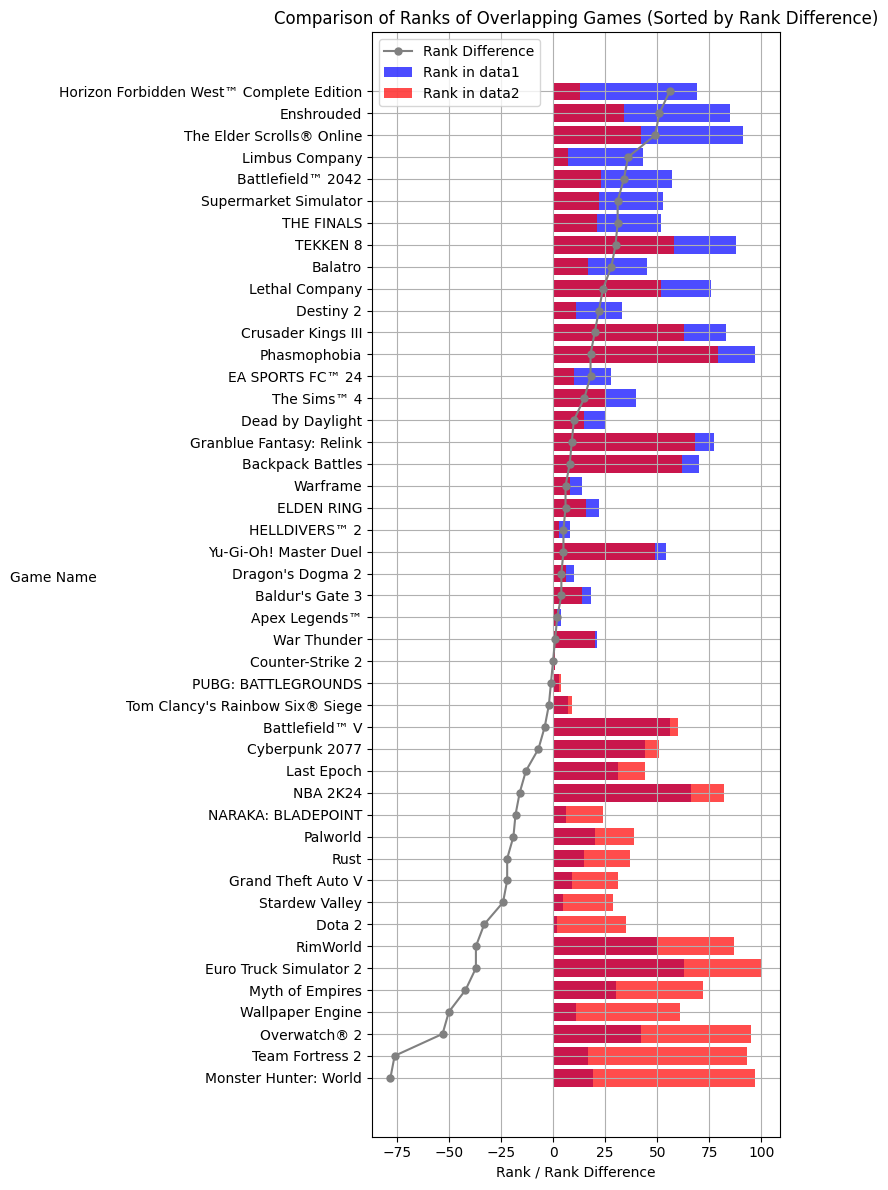

In [220]:
import matplotlib.pyplot as plt

# 순위 격차가 작은 순으로 데이터프레임 정렬
merged_data_sorted = merged_data.sort_values(by='Rank_Difference')

# 겹치는 게임들의 순위 가져오기
overlapping_game_names = merged_data_sorted['Game Name'].tolist()
rank_data1 = merged_data_sorted['Rank_x']
rank_data2 = merged_data_sorted['Rank_y']
rank_difference = merged_data_sorted['Rank_Difference']

# 그래프 그리기
plt.figure(figsize=(8, 12))

# rank1과 rank2를 막대 그래프로 그리기
plt.barh(overlapping_game_names, rank_data1, label='Rank in data1', color='blue', alpha=0.7)
plt.barh(overlapping_game_names, rank_data2, label='Rank in data2', color='red', alpha=0.7)

# 격차를 선 그래프로 그리기
plt.plot(rank_difference, overlapping_game_names, label='Rank Difference', marker='o', linestyle='-', markersize=5, color='gray')

plt.xlabel('Rank / Rank Difference')
plt.ylabel('Game Name', rotation = 0)
plt.title('Comparison of Ranks of Overlapping Games (Sorted by Rank Difference)')
plt.legend()

plt.grid(True)
plt.tight_layout()  # 그래프 재배치

plt.savefig('OverlappingGames_difference3.png', dpi=300)  # 이미지 파일로 저장, dpi는 해상도를 나타냅니다.
plt.show()



In [245]:
data3= pd.read_csv('youtube_games.csv')

# 두 데이터프레임을 게임 이름을 기준으로 합침
df_rankview = pd.merge(merged_data, data3, on='Game Name', how='inner')

# 조회 수 큰 순으로 정렬
df_rankview_sorted = df_rankview.sort_values(by='조회수', ascending=False)

#df_rankview_sorted['조회수'] = df_rankview['조회수'].astype(int).apply(lambda x: "{:,}".format(x))

df_rankview_sorted


,Game Name,Current Players,Peak Today,Rank_x,게임 가격,Rank_y,Rank_Difference,조회수
5,Tom Clancy's Rainbow Six® Siege,"80,777","159,673",7,"₩ 15,400",9,-2,197175126
0,Counter-Strike 2,"725,930","1,491,977",1,Free To Play,1,0,147401676
10,War Thunder,"36,187","72,447",21,Free To Play,20,1,143905309
1,PUBG: BATTLEGROUNDS,"259,659","637,297",3,Free To Play,4,-1,93362909
11,ELDEN RING,"32,389","63,873",22,"₩ 14,850",16,6,67115498
20,Battlefield™ 2042,"13,213","31,209",57,Free To Play,23,34,60769181
8,Warframe,"48,608","80,039",14,"₩ 22,400",8,6,56588535
12,Dead by Daylight,"30,453","60,139",25,"₩ 64,800",15,10,51723701
2,Apex Legends™,"145,375","387,994",4,Free To Play,2,2,48578700
21,Horizon Forbidden West™ Complete Edition,"10,957","28,521",69,"₩ 66,000",13,56,35125280


c:\Users\GF76\.conda\envs\sesac2024\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GF76\.conda\envs\sesac2024\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GF76\.conda\envs\sesac2024\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GF76\.conda\envs\sesac2024\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\GF76\.conda\envs\sesac2024\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.

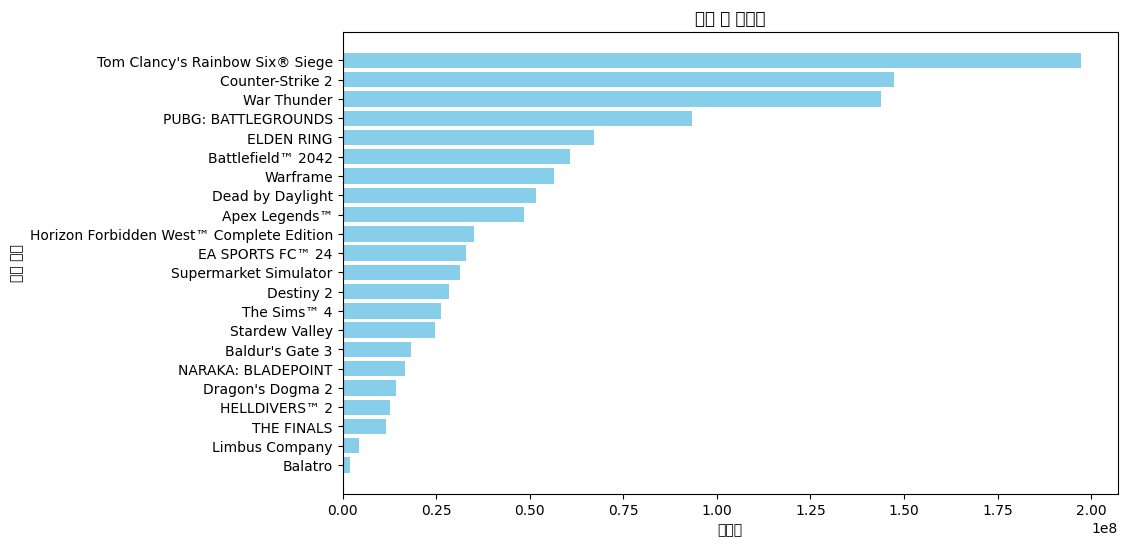

In [246]:
import matplotlib.pyplot as plt

# 조회수 큰 순으로 정렬된 데이터프레임을 가져옴
df_rankview_sorted = df_rankview.sort_values(by='조회수', ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(df_rankview_sorted['Game Name'], df_rankview_sorted['조회수'], color='skyblue')
plt.xlabel('조회수')
plt.ylabel('게임 이름')
plt.title('게임 별 조회수')
plt.gca().invert_yaxis()  # y 축 순서 뒤집기 (조회수가 큰 순서대로 표시)
plt.show()